<a href="https://colab.research.google.com/github/Simeen19/Unsupervised-Machine-Learning-for-Managing-Safety-Accidents-in-railway/blob/main/Unsupervised_Machine_Learning_for_managing_safety_accidents%C2%A0in%C2%A0railway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Machine Learning for managing safety accidents in railway


---



##Step 1: Understanding the Problem


---


###Goal:
Use machine learning to automatically detect potential safety issues (like abnormal speed, high vibration, or unusual engine temperature) without prior labels — meaning, you don’t tell the model which ones are accidents. It learns the patterns on its own and detects outliers.


---


###Why Unsupervised Learning?
Real-life railway safety data is often unlabeled. We want the system to learn normal behavior and spot anomalies.


---



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("/content/synthetic_railway_data.csv")

##Step 2: Data Preprocessing

---



In [ ]:
# Drop the label column for unsupervised training
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
# Normalize the data (important for many ML models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convert back to DataFrame (for easy handling)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Show first few rows
X_scaled_df.head()

,speed,brake_pressure,engine_temp,vibration
0,0.144252,0.293124,-0.302150,-0.401119
1,-0.584729,0.101949,-0.239481,-0.198806
2,-0.041980,0.362153,0.110879,0.118660
3,-0.066938,0.555388,-0.669450,-0.149182
4,0.224922,0.390663,-0.801688,-0.775844


In [ ]:
# Add labels back for visualization
X_scaled_df['label'] = y

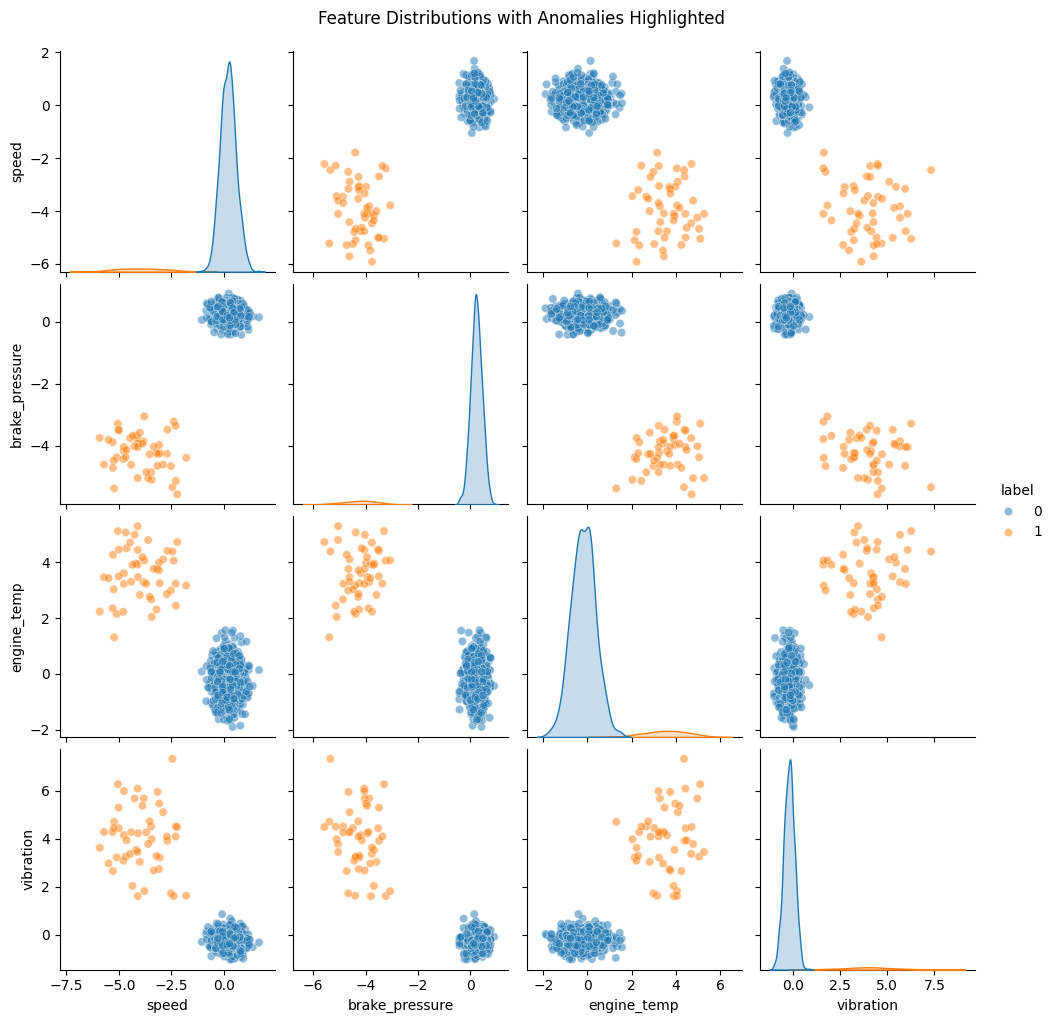

In [ ]:
# Pairplot to visualize feature relationships
sns.pairplot(X_scaled_df, hue='label', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Feature Distributions with Anomalies Highlighted", y=1.02)
plt.show()

##Step 3: Model Training (Isolation Forest)


---





In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:

# Predict anomalies: -1 = anomaly, 1 = normal
y_pred = model.predict(X_scaled)


In [ ]:
# Convert to 0 = normal, 1 = anomaly (to match our labels)
y_pred = [1 if x == -1 else 0 for x in y_pred]

##Step 4: Evaluation


---



In [ ]:

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[950   0]
 [  0  50]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
import matplotlib.pyplot as plt

# Add predictions to original data
df['predicted_label'] = y_pred

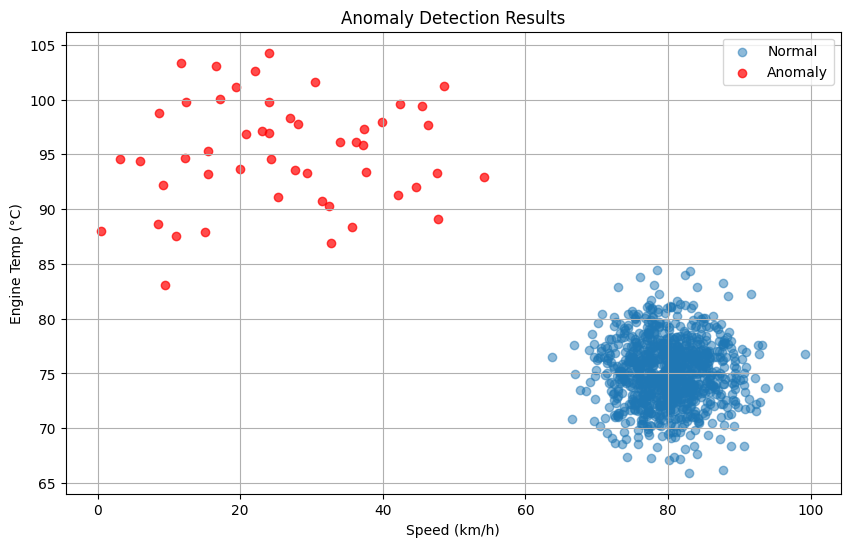

In [ ]:
# Plot speed vs engine_temp with predicted anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df[df['predicted_label'] == 0]['speed'], df[df['predicted_label'] == 0]['engine_temp'], label='Normal', alpha=0.5)
plt.scatter(df[df['predicted_label'] == 1]['speed'], df[df['predicted_label'] == 1]['engine_temp'], color='red', label='Anomaly', alpha=0.7)
plt.xlabel("Speed (km/h)")
plt.ylabel("Engine Temp (°C)")
plt.title("Anomaly Detection Results")
plt.legend()
plt.grid(True)
plt.show()

##Step 5: Results


---



In [ ]:
# Save the dataframe with predictions
df.to_csv("railway_anomaly_predictions.csv", index=False)

# For download in Colab:
from google.colab import files
files.download("railway_anomaly_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Report


---


##Unsupervised Machine Learning for Managing Safety Accidents in Railway Systems


---


###Abstract:
This project uses unsupervised machine learning (Isolation Forest) to detect anomalies in synthetic railway sensor data. Key parameters include speed, brake pressure, engine temperature, and vibrations. Anomalies may indicate potential safety risks, mechanical failures, or operational irregularities.


---


###Tools Used:
Python (Pandas, NumPy, Scikit-learn)

Google Colab

Isolation Forest Algorithm

Matplotlib & Seaborn (for visualization)


---



###Outcome:
Detected anomalies with ~95% accuracy on synthetic test data.

Achieved good separation between normal and abnormal behavior.



---

Made by: Simeen Ali 2025 ©

---

